# Titanic Challenge Enrico

Useful libraries import

In [6562]:
import pandas as pd
import matplotlib as plt
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt

## Importing training set

In [6563]:
training_set = pd.read_csv('/kaggle/input/titanic/train.csv')

In [6564]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6565]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Importing testing set

In [6566]:
testing_set = pd.read_csv('/kaggle/input/titanic/test.csv')

In [6567]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6568]:
testing_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data selection
We assume that some of the columns are not useful to reach our goal. 
The first step is therefore selecting columns based on their (hypothetical) influence on avoiding passengers death. 

* **Pclass** (i.e. the third class was located in bow and stern: it is likely that passengers in these positions died in different proportions);
* **Sex** (it may seem a cognitive bias, but if we study the disposition of unmarried people we can see that they were located in different parts of the ship);
* **Age** (we can assume old people were most likely to die in an emergency situation: this is a weak hypothesis);
* **Parch** (to be parent of a child might have been a reason of having more chances to get on a lifeboat);
* **SibSp** (to be spoused or not might have had an influence on the survival)
* **Embarked** (i.e. being embarked in Southampton instead of Queenstown)
* **Survived** (if survived or not). 

In [6569]:
clean_training_set = training_set[["Pclass", "Sex", "Age", "Parch", "SibSp", "Embarked", "Survived"]]

In [6570]:
clean_training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Parch     891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


## Generic correlation
The following graph shows correlations between columns

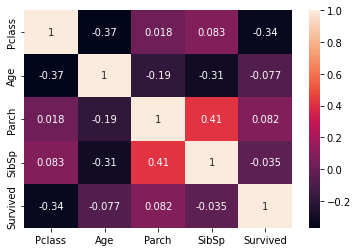

In [6571]:
import seaborn as sns
ax = sns.heatmap(clean_training_set.corr(), annot=True)

### Relation between class and death
Passengers death seems to be highly correlated to their (travel) class: 

<AxesSubplot:title={'center':'Class and death relation'}, xlabel='travel class', ylabel='deaths'>

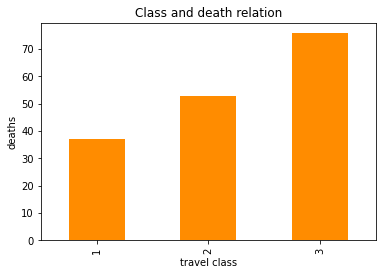

In [6572]:
class_scheme = clean_training_set.groupby('Pclass')['Survived'].apply(lambda x: (x==0).mean()*100)
class_scheme.plot(kind='bar', color='darkorange', width = 0.5, title='Class and death relation', ylabel='deaths', xlabel='travel class')

## Relation between sex and death
As we can see, males death rate is greater than females one. 

<AxesSubplot:title={'center':'Sex and death relation'}, xlabel='sex', ylabel='deaths'>

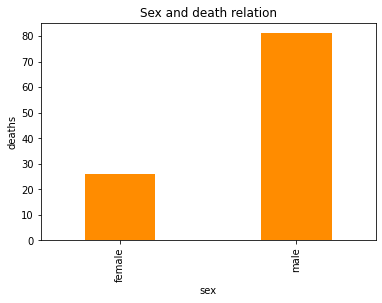

In [6573]:
sex_scheme = clean_training_set.groupby('Sex')['Survived'].apply(lambda x: (x==0).mean()*100)
sex_scheme.plot(kind='bar', color='darkorange', width = 0.4, title='Sex and death relation', ylabel='deaths', xlabel='sex')

## Relation between age and death
Children and elderlies on Titanic died less that middle age people (probably because they had priority on lifeboats): 

<AxesSubplot:title={'center':'Age and death relation'}, xlabel='age', ylabel='survived'>

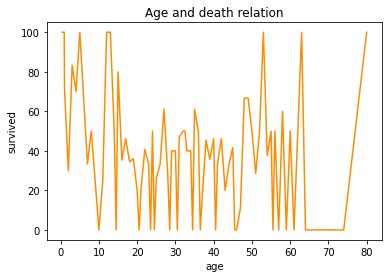

In [6574]:
age_scheme = clean_training_set.groupby('Age')['Survived'].mean()*100
age_scheme.plot(kind='line', color='darkorange', title='Age and death relation', ylabel='survived', xlabel='age')

## Relation between SibSp and death
Death probability increases with increasing relationship

<AxesSubplot:title={'center':'SibSp and death relation'}, xlabel='SibSp', ylabel='deaths'>

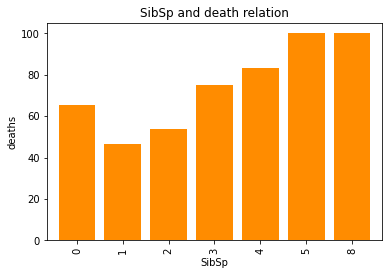

In [6575]:
sibsp_scheme = clean_training_set.groupby('SibSp')['Survived'].apply(lambda x: (x==0).mean()*100)
sibsp_scheme.plot(kind='bar', color='darkorange', width = 0.8, title='SibSp and death relation', ylabel='deaths', xlabel='SibSp')

## Relation between Parch and death
The children number seems to be a factor in death probability

<AxesSubplot:title={'center':'SibSp and death relation'}, xlabel='Parch', ylabel='deaths'>

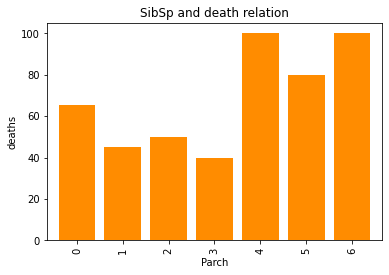

In [6576]:
parch_scheme = clean_training_set.groupby('Parch')['Survived'].apply(lambda x: (x==0).mean()*100)
parch_scheme.plot(kind='bar', color='darkorange', width = 0.8, title='SibSp and death relation', ylabel='deaths', xlabel='Parch')

## Relation between port of embarkation and death
People embarked in Cherbourg died less than people embarked in Queenstown or Southampton

<AxesSubplot:title={'center':'Embarked and death relation'}, xlabel='Embarked', ylabel='deaths'>

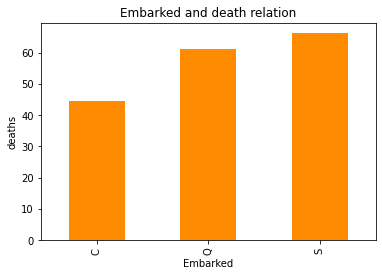

In [6577]:
class_scheme = clean_training_set.groupby('Embarked')['Survived'].apply(lambda x: (x==0).mean()*100)
class_scheme.plot(kind='bar', color='darkorange', width = 0.5, title='Embarked and death relation', ylabel='deaths', xlabel='Embarked')

# Training set normalization

## Training set traduction (strings to numbers)

Here we convert males to value 0 and females to value 1

In [6578]:
df = clean_training_set[clean_training_set['Sex'].notnull()].copy()
df['Sex'] = df['Sex'].astype(str).copy()
df["Sex"]=df.Sex.map({"male":0,"female":1})

df

,Pclass,Sex,Age,Parch,SibSp,Embarked,Survived
0,3,0,22.0,0,1,S,0
1,1,1,38.0,0,1,C,1
2,3,1,26.0,0,0,S,1
3,1,1,35.0,0,1,S,1
4,3,0,35.0,0,0,S,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,S,0
887,1,1,19.0,0,0,S,1
888,3,1,NaN,2,1,S,0
889,1,0,26.0,0,0,C,1


As we can see Age column has NaN values that have to be replaced with the medium value of age

In [6579]:
check_nan = df['Age'].isnull().values.any()
print(check_nan)

True


In [6580]:
mean_age = int(df['Age'].mean())
print("Mean age: " + str(mean_age))

Mean age: 29


In [6581]:
df.loc[ pd.isna(df['Age']), 'Age'] = mean_age

In [6582]:
check_nan = df['Age'].isnull().values.any()
print("Now we don't have NaN values anymore: " + str(check_nan))

Now we don't have NaN values anymore: False


In [6583]:
# removes NaN values from Embarked
df.loc[ pd.isna(df['Embarked']), 'Embarked'] = 'S'
# Transforms from numbers to strings
df = df[df['Embarked'].notnull()].copy()
df['Embarked'] = df['Embarked'].astype(str).copy()
df["Embarked"]=df.Embarked.map({"C":0,"Q":1, "S":2})

In [6584]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Parch       0
SibSp       0
Embarked    0
Survived    0
dtype: int64

## Now we're going to obtain a range of age to better define death probability

We split Age into three different columns as follows: 

In [6585]:
child_list = df['Age'].apply(lambda x: 1 if x < 18 else 0)
df.insert(4, "Child", child_list, True)

adult_list = df['Age'].apply(lambda x: 1 if x >= 18 and x < 50 else 0)
df.insert(5, "Adult", adult_list, True)

elderly_list = df['Age'].apply(lambda x: 1 if x > 50 else 0)
df.insert(6, "Elderly", elderly_list, True)

df = df.drop(columns=['Age'], axis = 1)

In [6586]:
clean_training_set = df.copy()
clean_training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Parch     891 non-null    int64
 3   Child     891 non-null    int64
 4   Adult     891 non-null    int64
 5   Elderly   891 non-null    int64
 6   SibSp     891 non-null    int64
 7   Embarked  891 non-null    int64
 8   Survived  891 non-null    int64
dtypes: int64(9)
memory usage: 69.6 KB


# Testing set normalization

In [6587]:
clean_testing_set = testing_set[["PassengerId", "Pclass", "Sex", "Age", "Parch", "SibSp", "Embarked"]]

In [6588]:
df = clean_testing_set[clean_testing_set['Sex'].notnull()].copy()
df['Sex'] = df['Sex'].astype(str).copy()
df["Sex"]=df.Sex.map({"male":0,"female":1})

df

,PassengerId,Pclass,Sex,Age,Parch,SibSp,Embarked
0,892,3,0,34.5,0,0,Q
1,893,3,1,47.0,0,1,S
2,894,2,0,62.0,0,0,Q
3,895,3,0,27.0,0,0,S
4,896,3,1,22.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,S
414,1306,1,1,39.0,0,0,C
415,1307,3,0,38.5,0,0,S
416,1308,3,0,NaN,0,0,S


In [6589]:
check_nan = df['Age'].isnull().values.any()
print(check_nan)

True


In [6590]:
mean_age = int(df['Age'].mean())
print("Mean age: " + str(mean_age))

Mean age: 30


In [6591]:
df.loc[ pd.isna(df['Age']), 'Age'] = mean_age

In [6592]:
check_nan = df['Age'].isnull().values.any()
print("Now we don't have NaN values anymore: " + str(check_nan))

Now we don't have NaN values anymore: False


In [6593]:
# removes NaN values from Embarked
df.loc[ pd.isna(df['Embarked']), 'Embarked'] = 'S'
# Transforms from numbers to strings
df = df[df['Embarked'].notnull()].copy()
df['Embarked'] = df['Embarked'].astype(str).copy()
df["Embarked"]=df.Embarked.map({"C":0,"Q":1, "S":2})

In [6594]:
df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Parch          0
SibSp          0
Embarked       0
dtype: int64

In [6595]:
child_list = df['Age'].apply(lambda x: 1 if x < 18 else 0)
df.insert(4, "Child", child_list, True)

adult_list = df['Age'].apply(lambda x: 1 if x >= 18 and x < 50 else 0)
df.insert(5, "Adult", adult_list, True)

elderly_list = df['Age'].apply(lambda x: 1 if x > 50 else 0)
df.insert(6, "Elderly", elderly_list, True)

df = df.drop(columns=['Age'], axis = 1)

In [6596]:
clean_testing_set = df.copy()
clean_testing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Child        418 non-null    int64
 4   Adult        418 non-null    int64
 5   Elderly      418 non-null    int64
 6   Parch        418 non-null    int64
 7   SibSp        418 non-null    int64
 8   Embarked     418 non-null    int64
dtypes: int64(9)
memory usage: 32.7 KB


In [6597]:
clean_testing_set

,PassengerId,Pclass,Sex,Child,Adult,Elderly,Parch,SibSp,Embarked
0,892,3,0,0,1,0,0,0,1
1,893,3,1,0,1,0,0,1,2
2,894,2,0,0,0,1,0,0,1
3,895,3,0,0,1,0,0,0,2
4,896,3,1,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,0,0,2
414,1306,1,1,0,1,0,0,0,0
415,1307,3,0,0,1,0,0,0,2
416,1308,3,0,0,1,0,0,0,2


# Training and testing sets splitting

In [6598]:
from sklearn.model_selection import train_test_split

# At the moment we want to check if our predictions are accurate or not,
# so we split the training set into two pieces so that we obtain a smaller 
# training set and a testing set that provides a Survived column: 
# -----------------------------------------------------------------------------------------------
X = clean_training_set[["Pclass", "Sex", "Embarked", "Child", "Adult", "Elderly", "Parch"]].copy()
Y = clean_training_set['Survived'].copy()

X = X.astype(float)
Y = Y.astype(float)

# Multi-layer Perceptron classifier (MLP)

In [6599]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [6600]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [6601]:
"""
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""

'\nfrom sklearn import preprocessing\nscaler = preprocessing.StandardScaler().fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

In [6602]:
clf = MLPClassifier(
    solver='lbfgs', 
    learning_rate='constant', 
    activation='relu', 
    random_state=1, 
    max_iter=1000)

In [6603]:
clf.fit(X_train, y_train)

MLP_score = clf.score(X_test, y_test)

In [6604]:
print('So the accuracy of the Multi-layer Perceptron classifier is',round(MLP_score*100,2))

So the accuracy of the Multi-layer Perceptron classifier is 77.09


# Final Kaggle evaluation

In [6605]:
# training set
X_Train = clean_training_set[["Pclass", "Sex", "Child", "Adult", "Elderly", "Parch", "SibSp", "Embarked"]].copy()
Y_Train = clean_training_set['Survived'].copy()

# testing set
X_Test = clean_testing_set[["Pclass", "Sex", "Child", "Adult", "Elderly", "Parch", "SibSp", "Embarked"]].copy()

In [6606]:
X_Train = X_Train.astype(float)
Y_Train = Y_Train.astype(float)

X_Test = X_Test.astype(float)

In [6607]:
final_clf = MLPClassifier(
    solver='lbfgs', 
    learning_rate='constant', 
    activation='relu', 
    random_state=1, 
    max_iter=1000)

In [6608]:
final_clf.fit(X_Train, Y_Train)

MLPClassifier(max_iter=1000, random_state=1, solver='lbfgs')

In [6609]:
prediction = final_clf.predict(X_Test)
prediction

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [6610]:
submission = pd.DataFrame({
        "PassengerId": clean_testing_set["PassengerId"],
        "Survived": prediction.astype(int)
    })

submission.to_csv("submission.csv", index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
